# Homework 3 (Dev Mody)
## Exercise 4 (Credit Check)

In this exercise we use a data sheet with a credit rating in `credit_dataset.csv`. This data set is described in Example 6.11 in the book by Watt et al. As usual the P = 1000 samples are arranged column wise with the last row being 1 (good rating) -1 (bad rating). The $N = 20$ input features describe things like current account balance, the duration in months of previous credit with the bank etc

### Exercise 4.1 (Standard Normalization)
As in the previous exercise it is difficult to compare the importance of the different features and it therefore makes sense to standard normalize. Perform a standard normalization of the input data.

ANSWER: The Standard Normalization is as follows:

In [5]:
import autograd.numpy as np
from autograd import grad
import pandas as pd
import matplotlib.pyplot as plt

def standard_normalizer (x):
    # compute the mean and standard deviation of the input
    x_means = np.nanmean(x,axis = 1)[:,np.newaxis]
    x_stds = np.nanstd(x,axis = 1)[:,np.newaxis]
    # check to make sure that x_stds > small threshold, for those not
    # divide by 1 instead of original standard deviation
    ind = np.argwhere(x_stds < 10**(-2))
    if len(ind) > 0:
        ind = [v[0] for v in ind] # Just keep the row index
        adjust = np.zeros((x_stds.shape))
        adjust[ind] = 1.0
        x_stds += adjust
        # fill in any nan values with means
        ind = np.argwhere(np.isnan(x) == True)
    for i in ind:
        x[i[0],i[1]] = x_means[i[0]]
    # create standard normalizer function
    normalizer = lambda data: (data - x_means)/x_stds
    # create inverse standard normalizer
    inverse_normalizer = lambda data: data*x_stds + x_means
    # return normalizer
    return normalizer,inverse_normalizer

def model(x, w):
    a = w[0] + np.dot(x.T, w[1:])
    return a.T

def softmax_cost (w):
    cost = np.sum(np.log(1 + np.exp(-y * model(x, w))))
    return cost / float(np.size(y))

def perceptron_cost(w):
    cost = np.sum(np.maximum(0, -y * model(x, w).flatten()))
    return cost / float(y.size)

def standard_gradient_descent (g, alpha, max_its, w):
    gradient = grad(g)
    weight_history = [w]
    cost_history = [g(w)]
    for _ in range(max_its):
        eval_grad = gradient(w)
        w = w - alpha*eval_grad
        weight_history.append(w)
        cost_history.append(g(w))
    return weight_history,cost_history

def miscount (w, x, y):
    predictions = np.sign(model(x, w))  # Apply sign to get class predictions
    misclassified = predictions != y  # Compare with true labels
    return np.sum(misclassified)  # Count misclassified points

csvname = '/Users/devmody/Documents/Courses/3ml3/homeworks/homework3/credit_dataset.csv'
data = np.loadtxt(csvname,delimiter = ',')
x = data[:-1,:]
normalizer, _ = standard_normalizer(x)
x = normalizer(x)
y = data[-1,:]

### Exercise 4.1 (Experiment)

Use the perceptron cost function to fit a model using gradient descent with `max_its=1000`, and a random starting vector `w = 0.1*np.random.randn(N+1,1)` and `alpha = 0.1`. Plot the cost function history along with the misclassification history versus the number of iterations. Can you achieve the 75% accuracy mentioned in the book?

ANSWER: The Experiment is as follows:

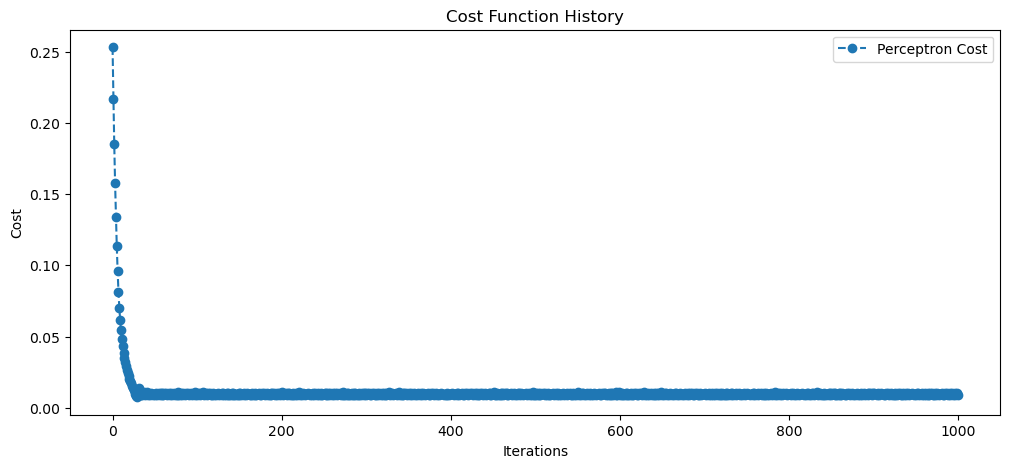

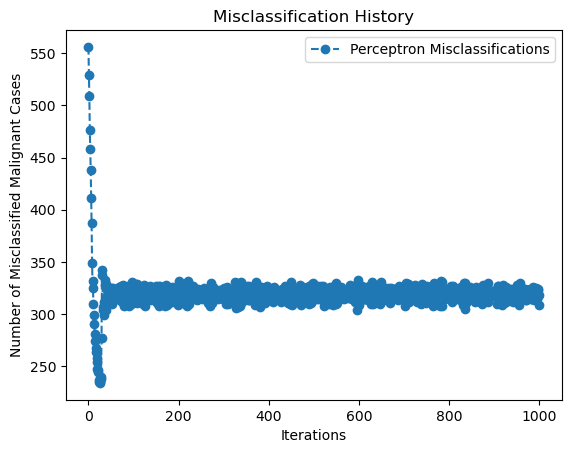

Minimum Misclassifications: 234
Accuracy: 76.60%


In [9]:
max_its = 1000
w = 0.1 * np.random.randn(21, 1)
alpha = 0.1

weight_history, cost_history = standard_gradient_descent(perceptron_cost, alpha, max_its, w)
miscount_history = [miscount(v, x, y) for v in weight_history]
iterations = np.arange(len(cost_history))

plt.figure(figsize=(12, 5))
plt.plot(iterations, cost_history, label="Perceptron Cost", linestyle='--', marker='o')
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function History")
plt.legend()
plt.show()

plt.plot(iterations, miscount_history, label="Perceptron Misclassifications", linestyle='--', marker='o')
plt.xlabel("Iterations")
plt.ylabel("Number of Misclassified Malignant Cases")
plt.title("Misclassification History")
plt.legend()
plt.show()

min_miscount = min(miscount_history)

# Calculate the accuracy
total_samples = y.size
accuracy = (total_samples - min_miscount) / total_samples

# Print the results
print(f"Minimum Misclassifications: {min_miscount}")
print(f"Accuracy: {accuracy * 100:.2f}%")


We have achieved over 75% accuracy

### Exercise 4.3 (Confusion Matrix)

Determine the confusion matrix for the optimal weights determined with the perceptron cost

ANSWER: The Confusion Matrix is as follows:

In [8]:
best_weight = weight_history[np.argmin(miscount_history)]
predictions_softmax = np.sign(model(x, best_weight)).flatten()

actual_labels = y
confusion_matrix = np.zeros((2, 2), dtype=int)

for actual, predicted in zip(actual_labels, predictions_softmax):
    if actual == 1 and predicted == 1:
        confusion_matrix[0, 0] += 1  # True Positives (TP)
    elif actual == 1 and predicted == -1:
        confusion_matrix[0, 1] += 1  # False Negatives (FN)
    elif actual == -1 and predicted == 1:
        confusion_matrix[1, 0] += 1  # False Positives (FP)
    elif actual == -1 and predicted == -1:
        confusion_matrix[1, 1] += 1  # True Negatives (TN)

print("Confusion Matrix (Softmax):")
print(confusion_matrix)

Confusion Matrix (Softmax):
[[613  87]
 [151 149]]
